# TZ3108 is an [18F] Tracer Studied in Non-human Primates

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np
from matplotlib import pyplot as plt

from Huang1980Model import Huang1980Model
from Ichise2002VascModel import Ichise2002VascModel
from Ichise2002Model import Ichise2002Model
from TZ3108 import TZ3108

TrivialArtery: found data for tracer tz3108
{'fqfp': '/Users/jjlee/Singularity/TZ3108/derivatives/sub-ollie/ses-20230516/pet/sub-ollie_ses-20230516_trc-tz3108_proc-verified-aif',
 'halflife': 6586.236,
 'img': array([1.35276408e-03, 1.37028371e-01, 4.36819611e+00, ...,
       5.11007428e-01, 5.11007428e-01, 5.11007428e-01]),
 'nii': <nibabel.nifti1.Nifti1Image object at 0x348d9d100>,
 'taus': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'times': array([1.99999998e+00, 7.99999998e+00, 1.40000000e+01, 1.90000000e+01,
       2.60000000e+01, 3.20000000e+01, 3.70000000e+01, 4.40000000e+01,
       5.00000000e+01, 5.50000000e+01, 6.50000000e+01, 7.60000000e+01,
       8.60000000e+01, 9.60000000e+01, 1.06000000e+02, 1.16000000e+02,
       1.76000000e+02, 2.36000000e+02, 2.96000000e+02, 5.97000000e+02,
       8.96000000e+02, 1.19600000e+03, 1.49600000e+03, 1.79600000e+03,
       2.09600000e+0

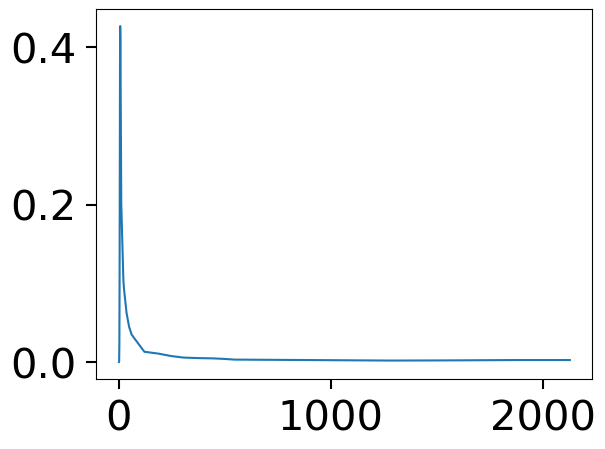

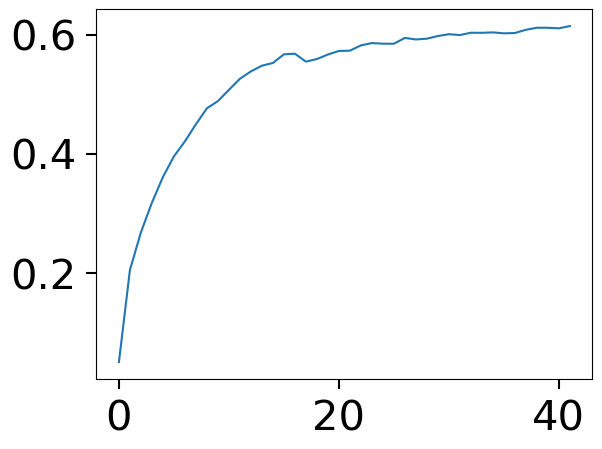

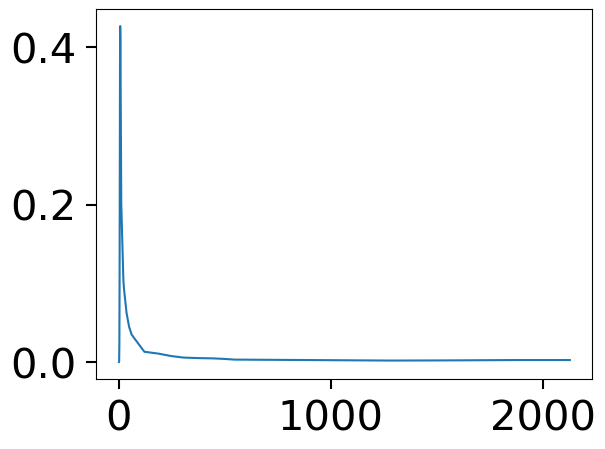

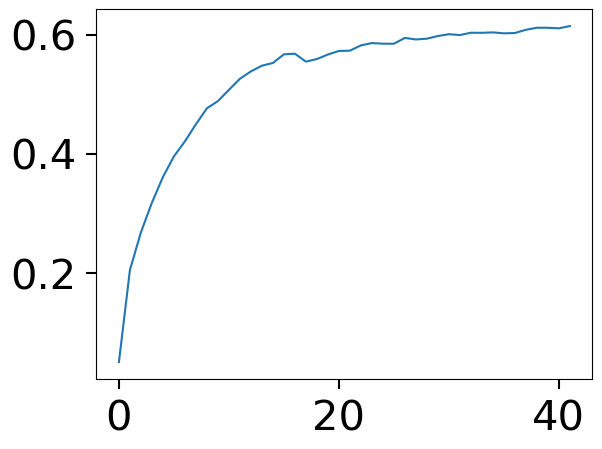

In [153]:
# define data & models
petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "TZ3108", "derivatives", "sub-ollie", "ses-20230516", "pet")
twil = os.path.join(petdir, "sub-ollie_ses-20230516_trc-tz3108_proc-verified-aif.nii.gz")
pet = os.path.join(petdir, "sub-ollie_ses-20230516_trc-tz3108_proc-verified-tacs.nii.gz")

huang = TZ3108(twil,
               pet,
               truths=[0.3, 0.001, 0.005, 0.0003, 0, 0, 0.021],
               nlive=30,
               tag="main-tz3108-huang-30",
               model="Huang1980Model",
               delta_time=5)
%matplotlib inline
plt.figure()
plt.plot(huang.data(huang.truths)["inputFuncInterp"])
plt.figure()
plt.plot(huang.data(huang.truths)["rho"])

# Parameter 0: 0.476 [0.423, 0.499]
# Parameter 1: 0.094 [0.082, 0.100]
# Parameter 2: 0.005 [0.005, 0.005]
# Parameter 3: 0.000 [0.000, 0.000]
# Parameter 4: 9.066 [7.285, 10.642]
# Parameter 5: -43.959 [-45.842, -41.835]
# Parameter 6: 0.021 [0.020, 0.023]

ichise_vasc = TZ3108(twil,
                     pet,
                     truths=[0.3, 0.004, 1e-6, 5e-4, 0.02, 90, 0, 0.021],
                     nlive=30,
                     tag="main-tz3108-ichise-vasc-30",
                     model="Ichise2002VascModel",
                     delta_time=5)
%matplotlib inline
plt.figure()
plt.plot(ichise_vasc.data(ichise_vasc.truths)["inputFuncInterp"])
plt.figure()
plt.plot(ichise_vasc.data(ichise_vasc.truths)["rho"])








parc_index = 1  # whole brain

## Inspect Huang1980Model twil

In [3]:
v = huang.truths
pprint("===================================== v ======================================")
pprint(v)

data = huang.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.3, 0.001, 0.005, 0.0003, 0, 0, 0.021]
'==================================== data ===================================='
{'delta_time': 1,
 'halflife': 6586.236,
 'inputFuncInterp': array([6.80455628e-06, 6.80455628e-06, 6.80456083e-06, ...,
       2.57042514e-03, 2.57042514e-03, 2.57042514e-03]),
 'martinv1': array(0.05),
 'raichleks': None,
 'rho': array([0.05030765, 0.20492752, 0.26810379, 0.31791721, 0.36089407,
       0.39554433, 0.42073949, 0.44944175, 0.47624623, 0.4882847 ,
       0.50720296, 0.52577618, 0.53815782, 0.54771692, 0.55232654,
       0.56678915, 0.56784485, 0.554537  , 0.5588467 , 0.56648747,
       0.57245858, 0.5729663 , 0.58177737, 0.58568642, 0.5846651 ,
       0.58457538, 0.59434298, 0.59176   , 0.59305701, 0.59751712,
       0.60056097, 0.59913174, 0.60304843, 0.6029013 , 0.60363644,
       0.60206108, 0.60255149, 0.60795286, 0.61141793, 0.61135952,
       0.61046876, 0.61424653

('============================== huang.data2t(data) '
 '===============================')
array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0797e+04, 1.0798e+04,
       1.0799e+04])
('============================= huang.data2taus(data) '
 '=============================')
array([ 60.   ,  60.   ,  60.   , 120.   , 120.   , 120.   , 120.   ,
       180.   , 180.   , 180.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 299.474])
('=========================== huang.data2timesMid(data) '
 '===========================')
array([   30.   ,    90.   ,   150.   ,   240.   ,   360.   ,   480.   ,
         600.   ,   750.   ,   930.   ,  1110.   ,  1350.   ,  1650.   ,
        1950.   ,  2250.   ,  2550.   ,  2850.   ,  3150.   ,  3450.   

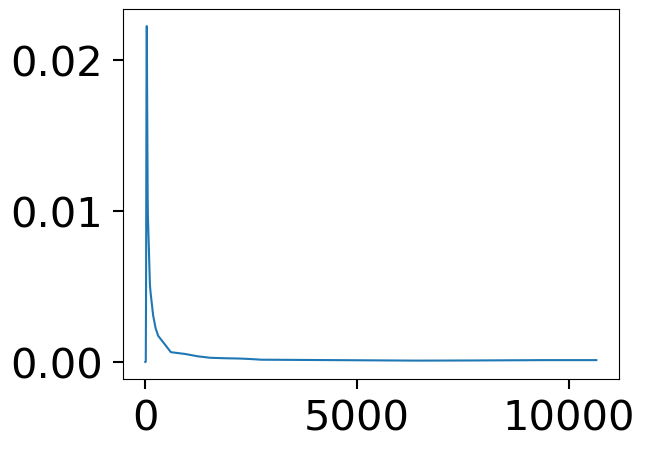

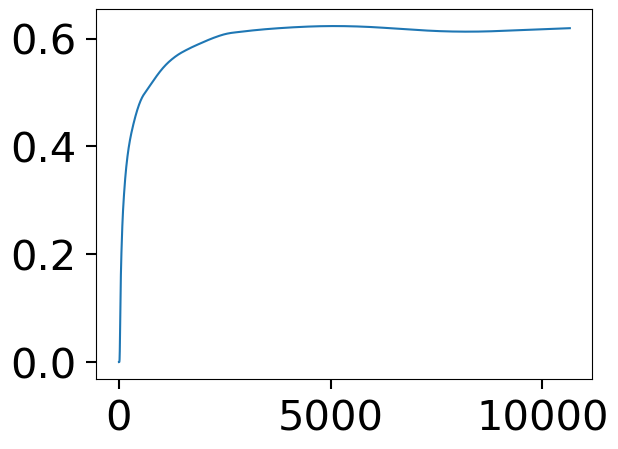

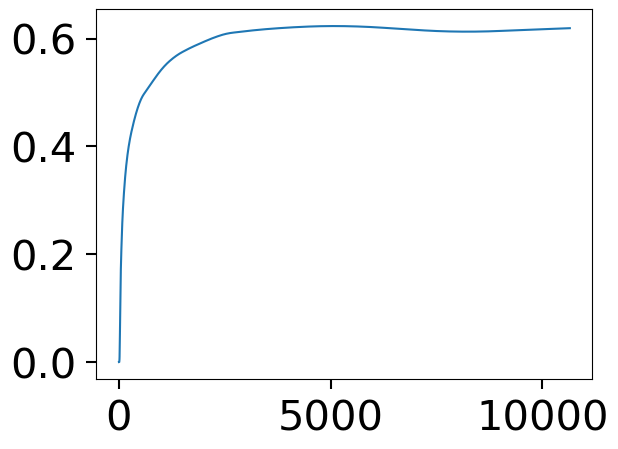

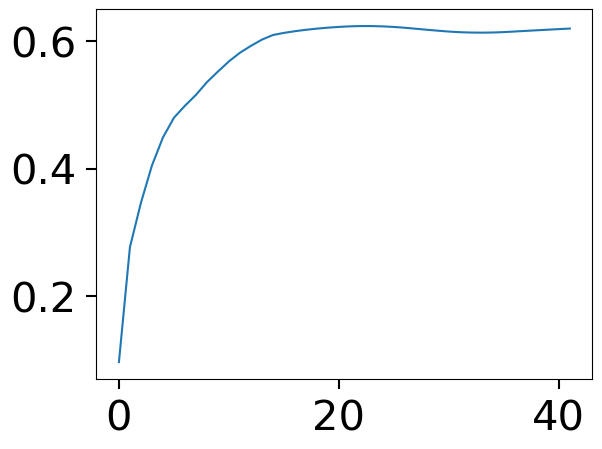

In [4]:
pprint("============================== huang.data2t(data) ===============================")
pprint(huang.data2t(data))
pprint("============================= huang.data2taus(data) =============================")
pprint(huang.data2taus(data))
pprint("=========================== huang.data2timesMid(data) ===========================")
pprint(huang.data2timesMid(data))
pprint("================================== huang.fqfp ===================================")
pprint(huang.fqfp)
pprint("========================== huang.input_function() =========================")
pprint(huang.input_function())
pprint("================================= huang.labels ==================================")
pprint(huang.labels)
pprint("====================== huang.load_nii(huang.fqfp + '.nii.gz') ======================")
pprint(huang.load_nii(huang.fqfp + ".nii.gz"))
pprint("=============================== huang.loglike(v) ================================")
pprint(huang.loglike(v))
pprint("================================== huang.ndim ===================================")
pprint(huang.ndim)
pprint("========================= huang.parse_halflife(huang.fqfp) =========================")
pprint(huang.parse_halflife(huang.fqfp))
pprint("========================= huang.parse_isotope(huang.fqfp) ==========================")
pprint(huang.parse_isotope(huang.fqfp))
pprint("================================== huang.sigma ==================================")
pprint(huang.sigma)
pprint("============================ huang.signalmodel(data) ============================")
pprint(huang.signalmodel(data))

%matplotlib inline
rho, timesMid, rho_t, times, rho_os, rho_p = huang.signalmodel(data, verbose=True)
plt.figure()
plt.plot(rho_p)
plt.figure()
plt.plot(rho_os)
plt.figure()
plt.plot(rho_t)
plt.figure()
plt.plot(rho)

## Plot Huang1980Model twil

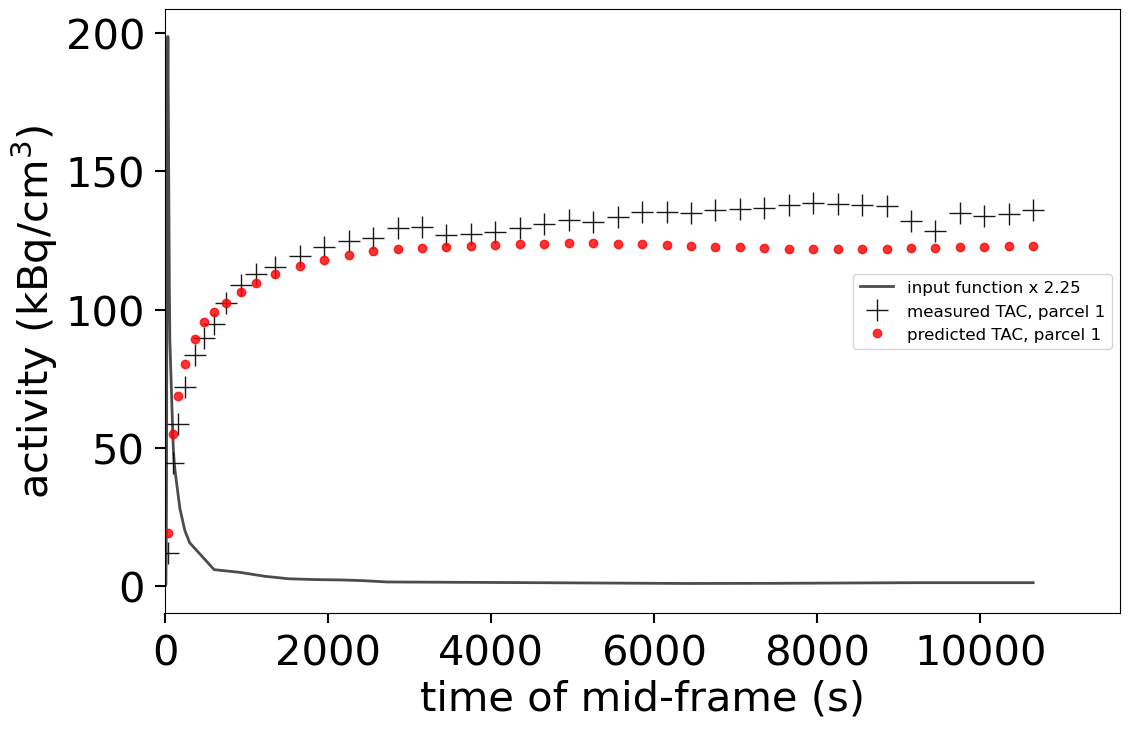

In [5]:
huang.plot_truths(parc_index=parc_index)

In [6]:
huang.truths

[0.3, 0.001, 0.005, 0.0003, 0, 0, 0.021]

In [ ]:
huang.plot_variations(3, 0.0001, 0.001, huang.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [57]:
# de novo
res_twil = huang.run_nested_for_indexed_tac(parc_index, print_progress=True)
huang.save_results(res_twil, "playground-for-TZ3108-Huang")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(huang.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 101 | batch: 0 | bound: 0 | nc: 5 | ncall: 658 | eff(%): 14.680 | loglstar:   -inf < -188.267 <    inf | logz: -194.005 +/-  0.395 | dlogz: 72.930 >  0.010                                     Traceback (most recent call last):
  File "/Users/jjlee/PycharmProjects/dynesty/dynesty-master/py/dynesty/dynesty.py", line 913, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/TCModel.py", line 329, in loglike
    rho_pred, _, _, _ = self.signalmodel(data)
  File "/Users/jjlee/PycharmProjects/dynesty/idif2024/Huang1980Model.py", line 107, in signalmodel
    conva = np.convolve(np.exp(-alpha * times), input_func_interp, mode="full")
  File "<__array_function__ internals>", line 200, in convolve
  File "/Users/jjlee/anaconda3/envs/dynesty/lib/python3.8/site-packages/numpy/core/numeric.py", line 851, in convolve
    return multiarray.correlate(a, v[::-1], mode)
KeyboardInterrupt


Exception while calling loglikelihood function:
  params: [7.85058958e-02 3.51102997e-01 4.84523048e-02 4.17667882e-02
 1.31512697e+00 4.96892433e+01 1.92988117e-02]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

## Inspect Ichise2002VascModel twil

In [154]:
v = ichise_vasc.truths
pprint("===================================== v ======================================")
pprint(v)

data = ichise_vasc.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.3, 0.004, 1e-06, 1e-05, 0.02, 90, 0, 0.021]
'==================================== data ===================================='
{'delta_time': 5,
 'halflife': 6586.236,
 'inputFuncInterp': array([6.80455628e-06, 6.89268197e-04, 2.19725203e-02, ...,
       2.57042514e-03, 2.57042514e-03, 2.57042514e-03]),
 'martinv1': array(0.05),
 'raichleks': None,
 'rho': array([0.05030765, 0.20492752, 0.26810379, 0.31791721, 0.36089407,
       0.39554433, 0.42073949, 0.44944175, 0.47624623, 0.4882847 ,
       0.50720296, 0.52577618, 0.53815782, 0.54771692, 0.55232654,
       0.56678915, 0.56784485, 0.554537  , 0.5588467 , 0.56648747,
       0.57245858, 0.5729663 , 0.58177737, 0.58568642, 0.5846651 ,
       0.58457538, 0.59434298, 0.59176   , 0.59305701, 0.59751712,
       0.60056097, 0.59913174, 0.60304843, 0.6029013 , 0.60363644,
       0.60206108, 0.60255149, 0.60795286, 0.61141793, 0.61135952,
       0.61046876, 0.61

('============================== ichise_vasc.data2t(data) '
 '===============================')
array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0797e+04, 1.0798e+04,
       1.0799e+04])
('============================= ichise_vasc.data2taus(data) '
 '=============================')
array([ 60.   ,  60.   ,  60.   , 120.   , 120.   , 120.   , 120.   ,
       180.   , 180.   , 180.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 299.474])
('=========================== ichise_vasc.data2timesMid(data) '
 '===========================')
array([   30.   ,    90.   ,   150.   ,   240.   ,   360.   ,   480.   ,
         600.   ,   750.   ,   930.   ,  1110.   ,  1350.   ,  1650.   ,
        1950.   ,  2250.   ,  2550.   ,  2850.   ,  3

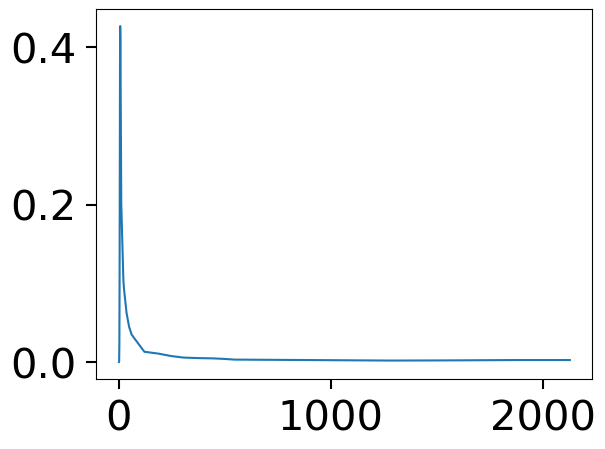

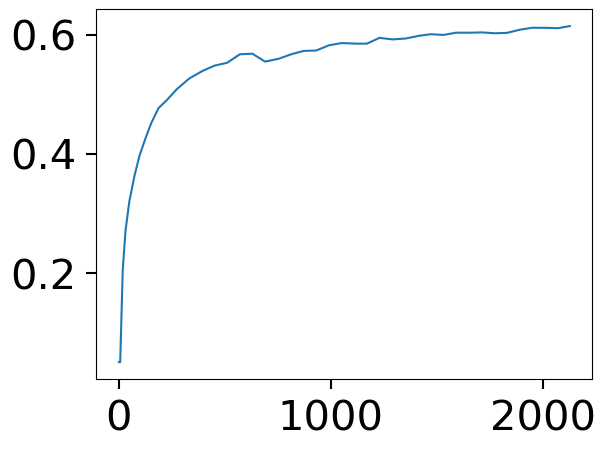

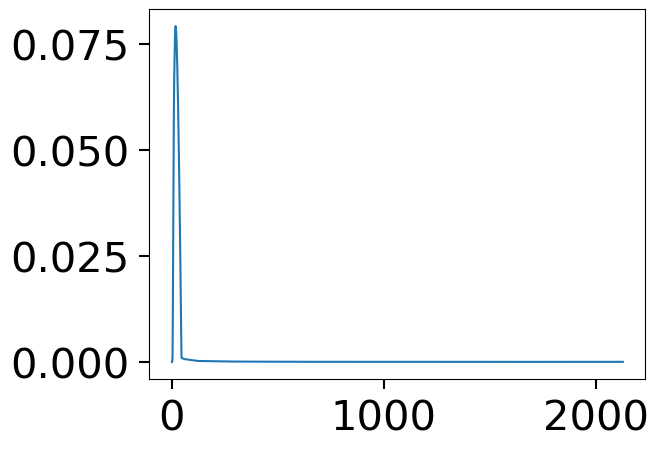

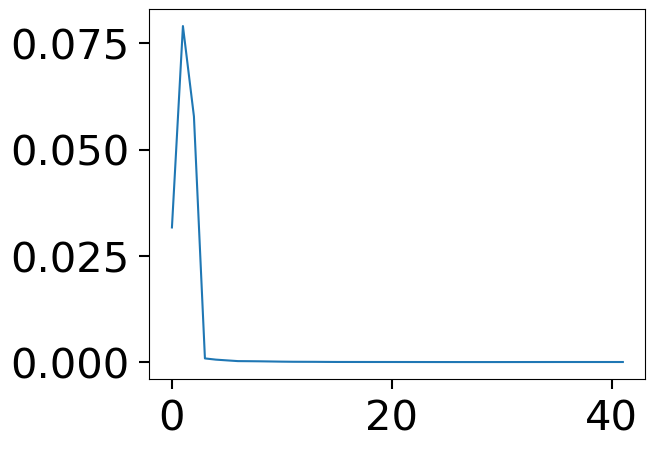

In [155]:
pprint("============================== ichise_vasc.data2t(data) ===============================")
pprint(ichise_vasc.data2t(data))
pprint("============================= ichise_vasc.data2taus(data) =============================")
pprint(ichise_vasc.data2taus(data))
pprint("=========================== ichise_vasc.data2timesMid(data) ===========================")
pprint(ichise_vasc.data2timesMid(data))
pprint("================================== ichise_vasc.fqfp ===================================")
pprint(ichise_vasc.fqfp)
pprint("========================== ichise_vasc.input_function() =========================")
pprint(ichise_vasc.input_function())
pprint("================================= ichise_vasc.labels ==================================")
pprint(ichise_vasc.labels)
pprint("====================== ichise_vasc.load_nii(ichise_vasc.fqfp + '.nii.gz') ======================")
pprint(ichise_vasc.load_nii(ichise_vasc.fqfp + ".nii.gz"))
# pprint("=============================== ichise_vasc.loglike(v) ================================")
# pprint(ichise_vasc.loglike(v))
pprint("================================== ichise_vasc.ndim ===================================")
pprint(ichise_vasc.ndim)
pprint("========================= ichise_vasc.parse_halflife(ichise_vasc.fqfp) =========================")
pprint(ichise_vasc.parse_halflife(ichise_vasc.fqfp))
pprint("========================= ichise_vasc.parse_isotope(ichise_vasc.fqfp) ==========================")
pprint(ichise_vasc.parse_isotope(ichise_vasc.fqfp))
pprint("================================== ichise_vasc.sigma ==================================")
pprint(ichise_vasc.sigma)
pprint("============================ ichise_vasc.signalmodel(data) ============================")
pprint(ichise_vasc.signalmodel(data))

%matplotlib inline
rho, timesMid, rho_t, times, rho_os, rho_p = ichise_vasc.signalmodel(data, verbose=True)
plt.figure()
plt.plot(rho_p)
plt.figure()
plt.plot(rho_os)
plt.figure()
plt.plot(rho_t)
plt.figure()
plt.plot(rho)

## Plot Ichise2002VascModel twil

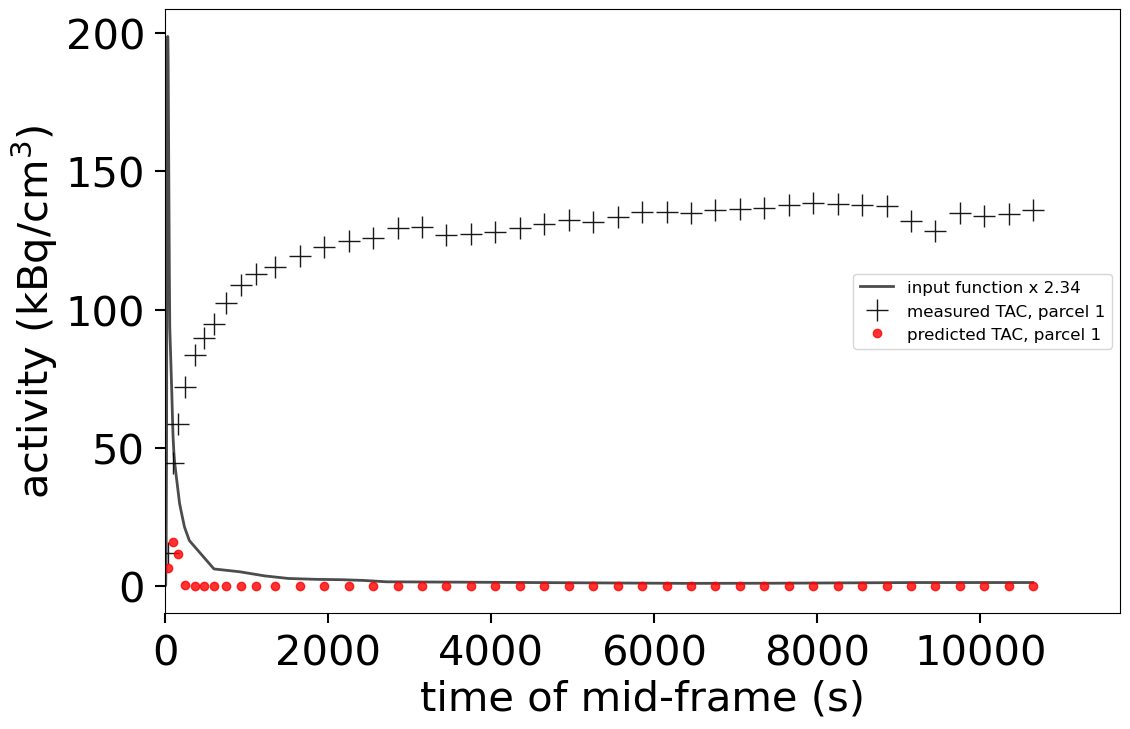

In [156]:
ichise_vasc.plot_truths(parc_index=parc_index)

In [157]:
ichise_vasc.truths

[0.3, 0.004, 1e-06, 1e-05, 0.02, 90, 0, 0.021]

KeyboardInterrupt: 

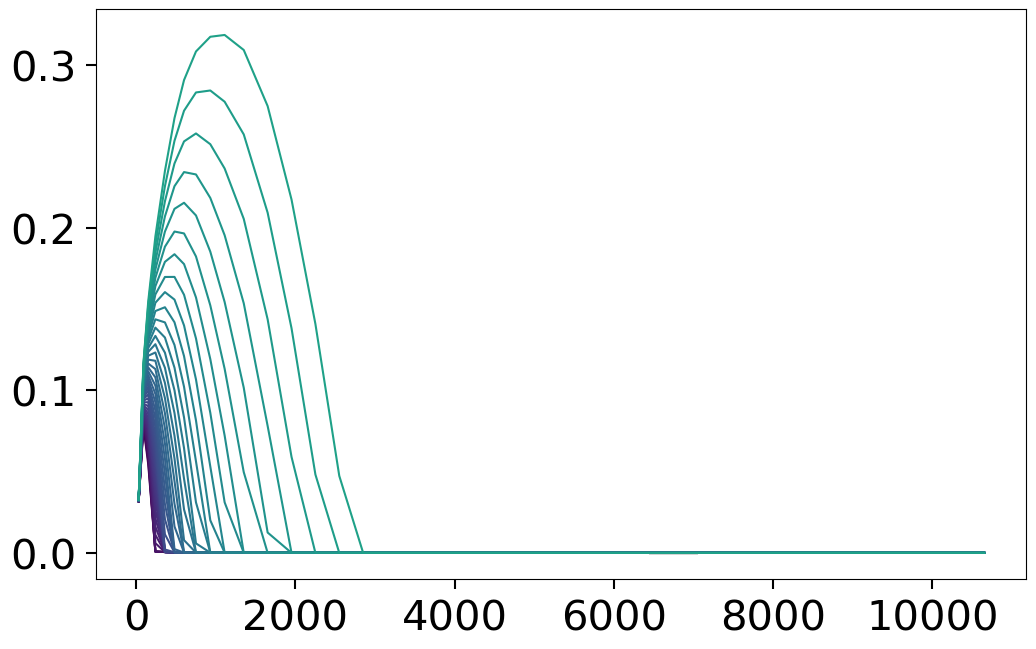

In [158]:
ichise_vasc.plot_variations(3, 1e-6, 0.0005, ichise_vasc.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_idif = ichise_vasc.run_nested_for_indexed_tac(parc_index, print_progress=True)
ichise_vasc.save_results(res_idif, "playground-for-TZ3108-Ichise")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(ichise_vasc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results